# Credit_Risk Project -- Haoxun

<br>
## Background

The credit risk data contains information on default payments, demographic factors, history of payment of a sample of 30,000 credit card clients from April 2005- September 2005. The dataset employed a binary variable, default payment (Yes = 1, No = 0), as the response variable and used 24 variables as explanatory variables. In this project, I tried to use selected explanatory variables to predict the default payment next month. 

First, I started with the descriptive univariate analysis to explore each variable in the dataset and then did bivariate/multivariate analysis to see whether there is any trend related to the default. Next, I made adjustments to some of the variables and created new groups of variables that are correlated with the final output. The final step was to train different models with multiple tuned parameters to find the optimized one.


#### Useful data explanation
-  Default next month: 1 - yes, 0 - no
-  Gender (1 = male; 2 = female). 
-  Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
-  Marital status (1 = married; 2 = single; 3 = others). 



<br>
## Data Exploration and Planning

1. Data exploration/cleaning 
    -  Exploration: Getting to know the data by conducting descriptive analysis.
    -  Data cleaning and pre-processing: Preparing dataset for modeling, including checking missing data and re-categorizing variables.
<br><br>
2. Model Construction
    -  Tree Model, Random Forest, Gradient Boosting with original variables
    -  Tree Model, Random Forest, Gradient Boosting with modified variables
    -  Logistic regression with selected variables from importance features
<br><br>
3. Evaluate model performance
    -  Normal accuracy (percentage of exact match)
    -  f1 score
    -  Calculating precision and recall to improve the model sensitivity of predicting default and minimize type II errors (false negative - probability of non-default, while in fact it’s default).  
    
    
#### Note
Based on the exploration, I found the outcome variable is imbalance, which the default rate in the sample data is 22%,. Hypothetically, even if I used DummyClassifier in Scikit-learn, a classifier that makes predictions using simple rules, to predict the most frequent label in set for all the points, I would achieve ~77% of accuracy no matter what.

Therefore, I decided to deal with the imbalanced dataset by:

-  Finding different way to evaluate model performance.
-  Adjusting the sample data to be more balanced (upsample the default people or downsample the non-default people).


<br><br>
## Further Analysis

Given the limited time, the current analysis plan is not perfect and there is still space to improve:

-  'PAY_1' is indicated as a predominant feature by most of the models. If I had more time, I would analyze how pay period is correlated with the final output and discover if there are any other potential variables.
-  Model accuracy can be further increase with proper tuning. If I had more time, I would do parameter tuning (i.e., Grident Search CV method) to improve the model accuracy. 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
credit_card=pd.read_excel("E:/Importance/FT_Project/credit_defaults.xlsx",sheetname="credit_defaults",parse_cols="B:Y",skiprows = 1)
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [3]:
for col in credit_card.columns:
    print (col, credit_card[col].nunique())

(u'LIMIT_BAL', 81)
(u'SEX', 2)
(u'EDUCATION', 7)
(u'MARRIAGE', 4)
(u'AGE', 56)
(u'PAY_0', 11)
(u'PAY_2', 11)
(u'PAY_3', 11)
(u'PAY_4', 11)
(u'PAY_5', 10)
(u'PAY_6', 10)
(u'BILL_AMT1', 22723)
(u'BILL_AMT2', 22346)
(u'BILL_AMT3', 22026)
(u'BILL_AMT4', 21548)
(u'BILL_AMT5', 21010)
(u'BILL_AMT6', 20604)
(u'PAY_AMT1', 7943)
(u'PAY_AMT2', 7899)
(u'PAY_AMT3', 7518)
(u'PAY_AMT4', 6937)
(u'PAY_AMT5', 6897)
(u'PAY_AMT6', 6939)
(u'default payment next month', 2)


<br><br><br>
### Data Cleaning

I started with organizing variables to be better fit to the model. By checking the unique count for each column, I found the counts for 'EDUCATION', 'MARRIAGE' and 'PAY_0' were not consistent with what described in the second tab of the input spreadsheet. I made some adjustments to standardize the data format. 

There is no missing value in this dataset.

Based on the quantile analysis, some of the subjects had extremely high limit balance, bill amount or payment amount. I did not consider them as outliers, instead, I kept them in the data set to make sure the model takes them into account. 


In [4]:
credit_card = credit_card.rename(columns = {'default payment next month':'def','PAY_0':'PAY_1'})
print credit_card.EDUCATION.value_counts(),'\n'
print credit_card.MARRIAGE.value_counts(),'\n'
print credit_card.PAY_1.value_counts()

credit_card.loc[(credit_card.EDUCATION==5)|(credit_card.EDUCATION==6)|(credit_card.EDUCATION==0),'EDUCATION'] = 4
credit_card.loc[credit_card.MARRIAGE == 0,'MARRIAGE'] = 3
credit_card.loc[(credit_card.PAY_1==-2)|(credit_card.PAY_1==0),'PAY_1'] = -1
credit_card.loc[(credit_card.PAY_2==-2)|(credit_card.PAY_2==0),'PAY_2'] = -1
credit_card.loc[(credit_card.PAY_3==-2)|(credit_card.PAY_3==0),'PAY_3'] = -1
credit_card.loc[(credit_card.PAY_4==-2)|(credit_card.PAY_4==0),'PAY_4'] = -1
credit_card.loc[(credit_card.PAY_5==-2)|(credit_card.PAY_5==0),'PAY_5'] = -1
credit_card.loc[(credit_card.PAY_6==-2)|(credit_card.PAY_6==0),'PAY_6'] = -1

print '\nAfter modifications:\n'
print credit_card.EDUCATION.value_counts(),'\n'
print credit_card.MARRIAGE.value_counts(),'\n'
print credit_card.PAY_1.value_counts()


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64 

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64 

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

After modifications:

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64 

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64 

-1    23182
 1     3688
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64


<br><br>
Looking at the general statistics of each feature, I can see that some of people have extremely “high limit balance”, “bill amount” and “payment amount”, which should not be treated as outliers and should be included in our model.  

For the “bill amount”, the minimum amount is negative. It means people paid more than they owed in those periods and thus left some credits in the card.


In [5]:
credit_card[['AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,35.485500,-0.415967,-0.532033,-0.555500,-0.624233,-0.679567,-0.670800
std,9.217904,1.142591,1.146393,1.126275,1.067522,1.001726,1.005283
min,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,34.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,41.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [6]:
credit_card[['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,167484.322667,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,129747.661567,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,10000.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,50000.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,140000.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,240000.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,1000000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [7]:
credit_card[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


<br><br>
### I changed AGE to be a categorical variable.

I changed AGE from continuous variable to categorical variable by categorizing AGE into some meaningful buckets. My cutting rational was based on the common life stage of a person (i.e., students without income are likely to be <= 24 yrs old). 

I also made some adjustments (slightly alter the cutting age) to make sure there were enough data points in each bucket. 




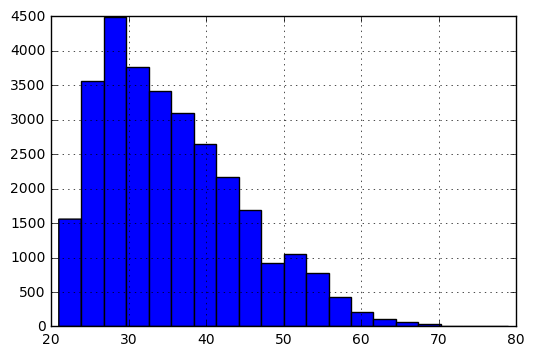

In [8]:
credit_card['AGE'].hist(bins=20)

In [9]:
age_dist = [20,25,30,40,50,81] #['student','young','adult','experienced','senior']
cat = [1,2,3,4,5]
print('the age cut will be ',age_dist)
credit_card['age_cut'] = pd.cut(credit_card.AGE,age_dist,labels=cat)
credit_card['age_cut'] = credit_card['age_cut'].astype(int)
credit_card['age_cut'].value_counts()

('the age cut will be ', [20, 25, 30, 40, 50, 81])


3    10713
2     7142
4     6005
1     3871
5     2269
Name: age_cut, dtype: int64

<br><br><br>
### Data Exploration and Pre-Processing

After cleaning the dataset, I started to test which variables are highly correlated with the default. First, I tried those categorical features such as SEX, MARRIGE, AGE and EDUCATION. 

The overall probability of default is around 0.22. 
The data indicates that:
  -  Male are more likely to default than female. 
  -  Single is least likely to default. 
  -  Higher education level will lead to lower default probability. 
  -  Student and seniors are more likely to default.


Beyond the discussed variables above, I also realized there are some uncertainties in the results.  Although the data indicates a married person is more likely to default than a single person, I am not sure whether it is truly caused by the marital status or it is because we have higher percentage of males in married group than that in single group. Therefore, I constructed another variable to combine SEX and Marriage to find the true contributes to the default. 

Based on the analysis I did below, I found: 
-	Male is more likely to default if he is married or divorced(other)
-	The default rate is lower for female regardless of her marital status. 
-	Divorced male are most likely to default but their group is very small in our sample. Most of the default were contributed by married male. 


For education and age, the data indicates SEX doesn't have obvious impact on both of them, so it is not necessary to combine them. 

0.2212


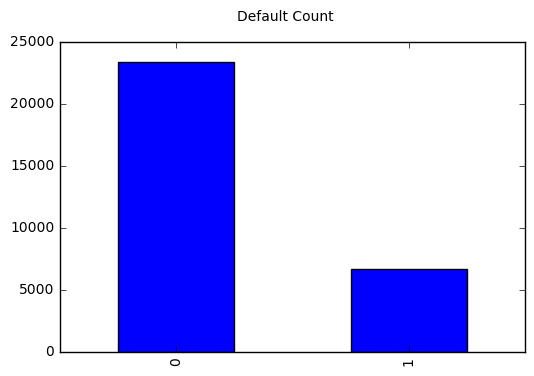

In [10]:
print(credit_card['def'].mean())
fig = plt.figure()
fig.suptitle('Default Count')
credit_card['def'].value_counts().plot(kind='bar')

In [11]:
print(credit_card.groupby('SEX')['def'].mean())
print(credit_card.groupby('MARRIAGE')['def'].mean())
print(credit_card.groupby('EDUCATION')['def'].mean())
print(credit_card.groupby('age_cut')['def'].mean())

SEX
1    0.241672
2    0.207763
Name: def, dtype: float64
MARRIAGE
1    0.234717
2    0.209283
3    0.236074
Name: def, dtype: float64
EDUCATION
1    0.192348
2    0.237349
3    0.251576
4    0.070513
Name: def, dtype: float64
age_cut
1    0.266598
2    0.201484
3    0.204331
4    0.232973
5    0.254297
Name: def, dtype: float64


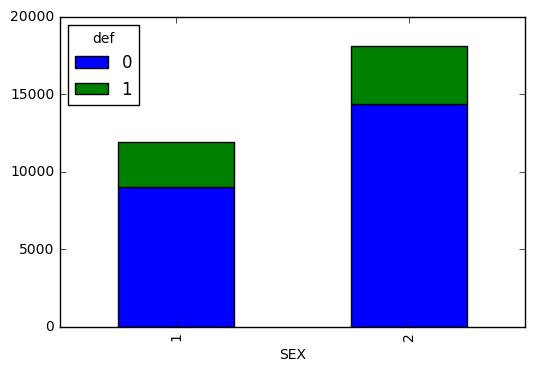

In [12]:
credit_card.groupby(['SEX','def']).size().unstack().plot(kind='bar',stacked=True)

In [13]:
print credit_card.groupby(['SEX','MARRIAGE'])['def'].mean().unstack(),'\n'
print credit_card.groupby(['SEX','MARRIAGE'])['def'].size().unstack(),'\n'
print credit_card.groupby(['SEX','EDUCATION'])['def'].mean().unstack(),'\n'
print credit_card.groupby(['SEX','age_cut'])['def'].mean().unstack(),'\n'
credit_card['SEX_mar'] = 0
credit_card.loc[((credit_card.SEX == 1) & (credit_card.MARRIAGE == 1)),'SEX_mar'] = 1
credit_card.loc[((credit_card.SEX == 1) & (credit_card.MARRIAGE == 2)),'SEX_mar'] = 2
credit_card.loc[((credit_card.SEX == 1) & (credit_card.MARRIAGE == 3)),'SEX_mar'] = 3
credit_card.loc[((credit_card.SEX == 2) & (credit_card.MARRIAGE == 1)),'SEX_mar'] = 4
credit_card.loc[((credit_card.SEX == 2) & (credit_card.MARRIAGE == 2)),'SEX_mar'] = 5
credit_card.loc[((credit_card.SEX == 2) & (credit_card.MARRIAGE == 3)),'SEX_mar'] = 6
print credit_card.groupby('SEX_mar').agg({'def':['count','mean']})

MARRIAGE         1         2         3
SEX                                   
1         0.259345  0.226614  0.289655
2         0.219625  0.197216  0.202586 

MARRIAGE     1     2    3
SEX                      
1         5190  6553  145
2         8469  9411  232 

EDUCATION         1         2         3         4
SEX                                              
1          0.208085  0.262002  0.273869  0.082353
2          0.181351  0.222043  0.236420  0.063758 

age_cut         1         2         3         4         5
SEX                                                      
1        0.292704  0.213672  0.232180  0.250483  0.272810
2        0.255358  0.194177  0.185197  0.219719  0.236999 

          def          
        count      mean
SEX_mar                
1        5190  0.259345
2        6553  0.226614
3         145  0.289655
4        8469  0.219625
5        9411  0.197216
6         232  0.202586


<br><br>
### Moving forward to the next column -  limit balance 

According to the histogram of limit balance, most people have limit balance under $800,000. After stratifying the default by limit balance, I found that people with lower limit balance is more likely to default. 

Then, I tried explore whether the default is related to the bill amount. The actual value of bill amount varied a lot. I assumed the richer people have higher limit balance and thus are more likely to spend more. To standardize people's payment, I used percentage amount (Bill / Limit Balance) to see whether there is any trend related to default.

The data indicates that people who spend higher percentage of their limit balance are more likely to default.


count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


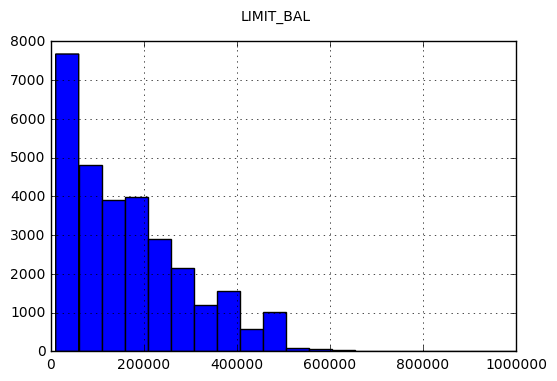

In [14]:
print(credit_card['LIMIT_BAL'].describe())
fig = plt.figure()
fig.suptitle('LIMIT_BAL')
credit_card['LIMIT_BAL'].hist(bins=20)

In [15]:
credit_card[credit_card['LIMIT_BAL']>= 800000]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def,age_cut,SEX_mar
2197,1000000,2,1,1,47,-1,-1,-1,-1,-1,...,961664,50784,50723,896040,50000,50000,50256,0,4,4
14919,800000,1,2,1,53,-1,-1,-1,-1,-1,...,9339,11145,64657,131,247,9366,63482,0,5,1
18006,800000,1,1,2,46,-1,-1,-1,-1,-1,...,3175,4644,3832,6219,1961,3183,27201,0,4,2


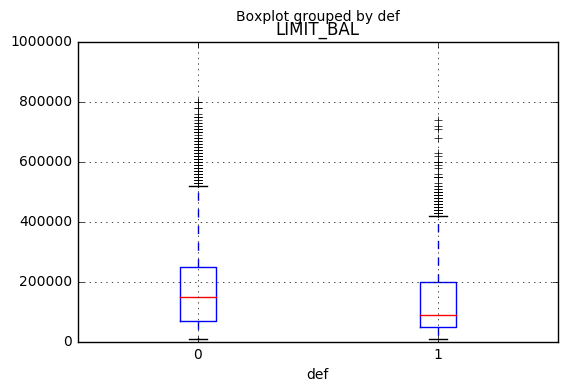

In [16]:
credit_card.boxplot(column='LIMIT_BAL',by='def')

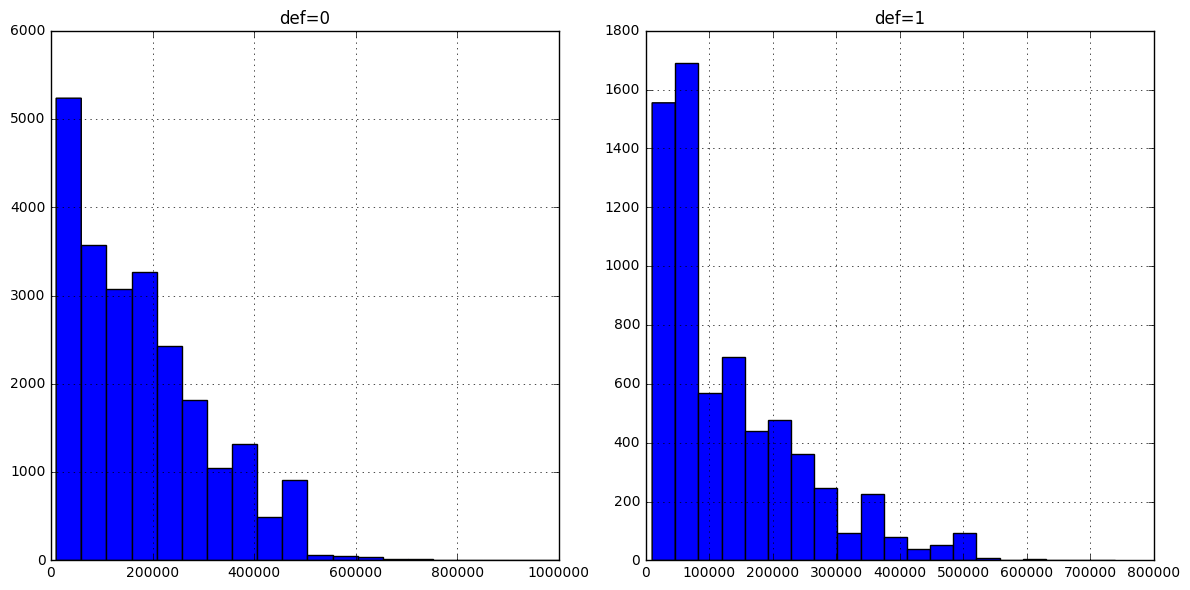

In [17]:
fig = plt.figure()
fig.set_size_inches([12,6])
ax = fig.add_subplot(1,2,1)
ax.set_title('def=0')
credit_card[credit_card['def']==0]['LIMIT_BAL'].hist(bins=20)
fig.tight_layout() 
ax = fig.add_subplot(1,2,2)
ax.set_title('def=1')
credit_card[credit_card['def']==1]['LIMIT_BAL'].hist(bins=20)
fig.tight_layout() 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F1B2898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D94E860>]], dtype=object)

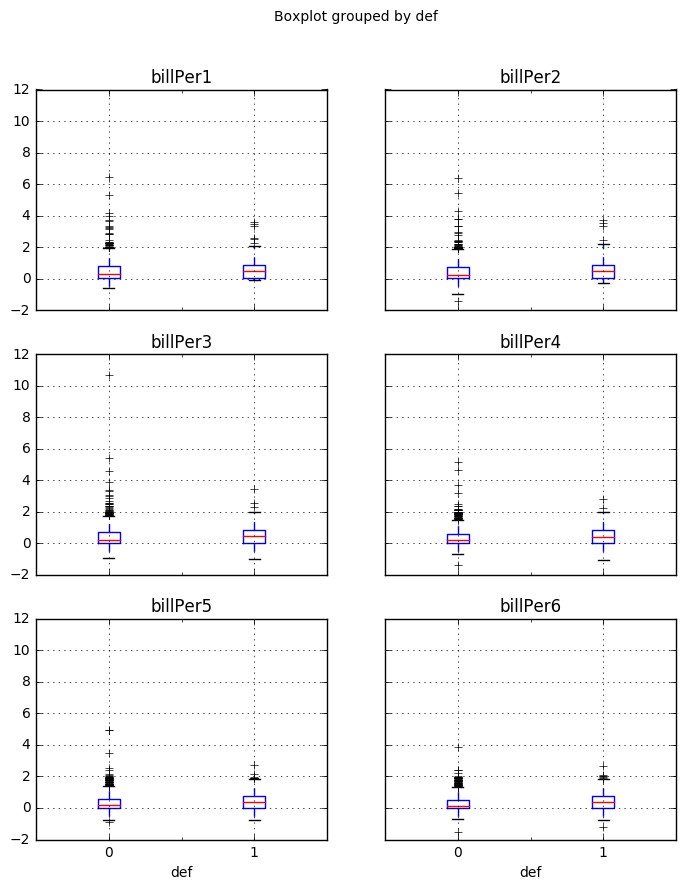

In [18]:
for i in range(6):
    credit_card['billPer'+str(i+1)] = credit_card['BILL_AMT'+str(i+1)]/credit_card['LIMIT_BAL']
credit_card.boxplot(column=['billPer1','billPer2','billPer3','billPer4','billPer5','billPer6'],by='def',figsize=(8,10))

<br><br>
### Next,

I took a closer look at pay_time, payment and bill amount to see if there is any abnormality. I think the default rate may be highly related to the pay time and the balance at each period after payment. 

-  PAY_1 - PAY_6 indicates the repayment status. I first looked at these columns to see whether longer period of delay leads to higher default probability.
    - Each period has 9 different repayment status
    - I combined some of them with similar default probability to make sample larger in each group set 
<br><br>
-  Defined variables 'Remaining Balance' in each period as (Bill Amount - Payment) / Balance Limit. 
    - I divided Balance Limit to standardize the balance since people have different consumption levels, which are partially reflected by the limit of balance.
    - People with more remaining balance are more likely to default


In [19]:
def draw_histogram(tmp,Nbin):
    name = [tmp+'1',tmp+'2',tmp+'3',tmp+'4',tmp+'5',tmp+'6']
    fig = plt.figure()
    fig.set_size_inches([9,6])
    for i in range(6):
        ax = fig.add_subplot(2,3,i+1)
        ax.set_title(name[i])
        credit_card[name[i]].hist(bins=Nbin)
        fig.tight_layout() 

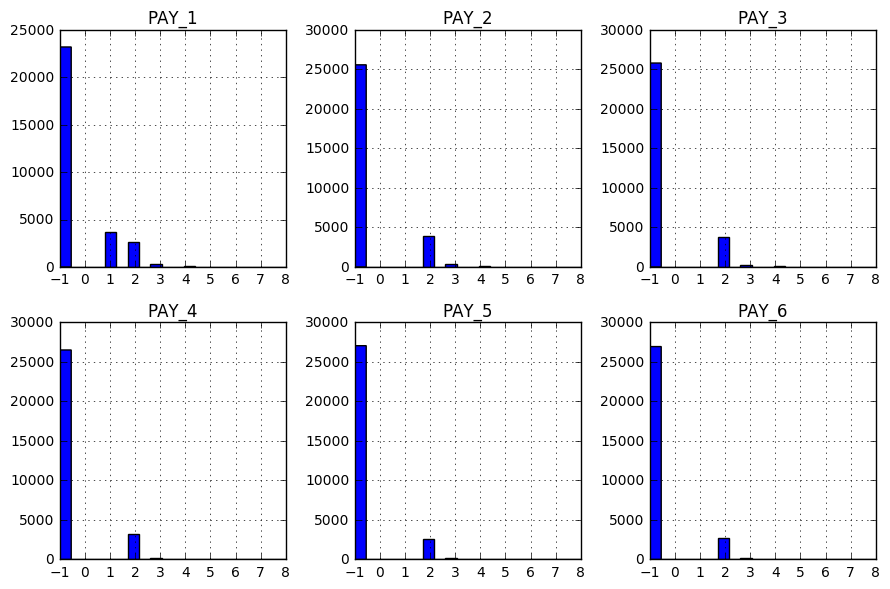

In [20]:
draw_histogram('PAY_',20)

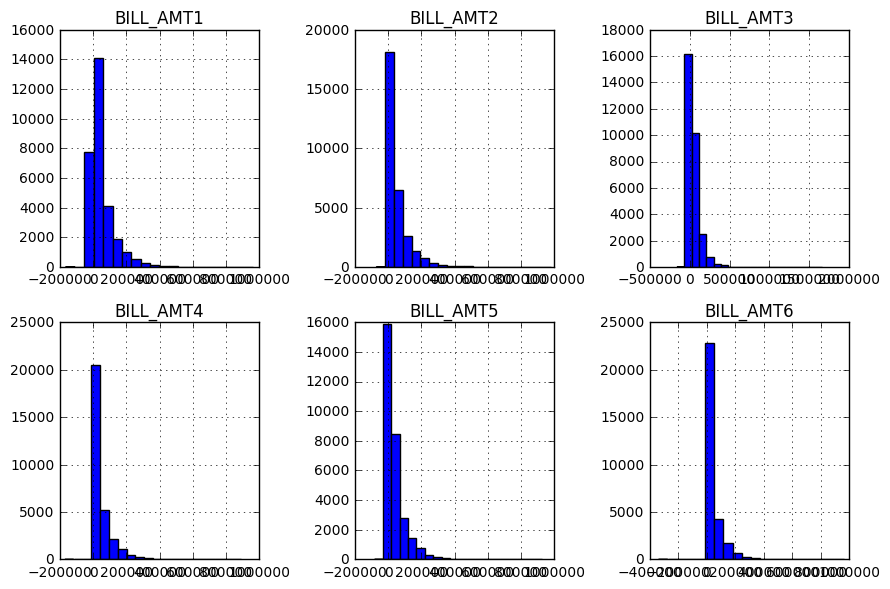

In [21]:
draw_histogram('BILL_AMT',20)

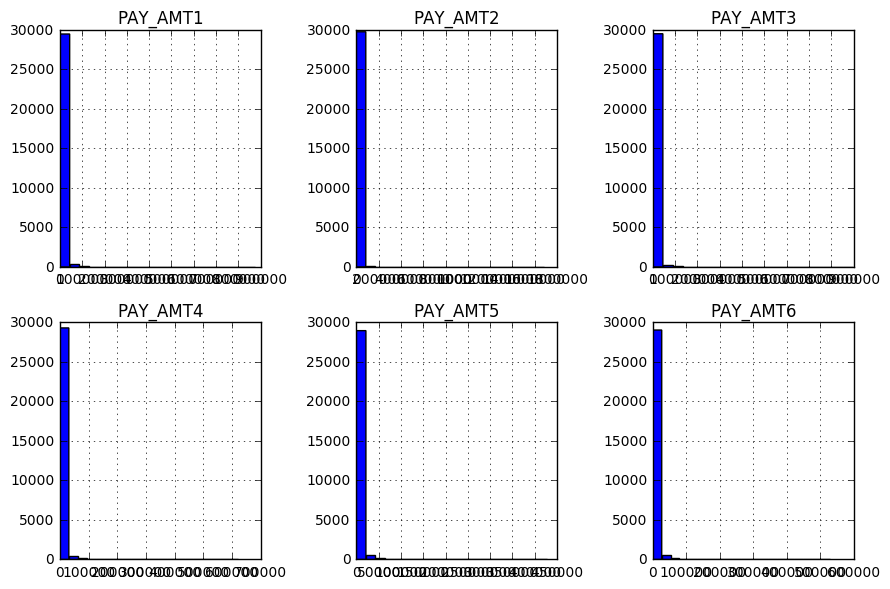

In [22]:
draw_histogram('PAY_AMT',20)

In [23]:
print (credit_card.groupby('PAY_1').agg({'def':['count','mean']}))
credit_card['PAYs_1'] = credit_card['PAY_1']
credit_card.loc[credit_card['PAYs_1']<1,'PAYs_1'] = 0
credit_card.loc[credit_card['PAYs_1']>=2,'PAYs_1'] = 2
credit_card.groupby('PAYs_1').agg({'def':['count','mean']})

         def          
       count      mean
PAY_1                 
-1     23182  0.138340
 1      3688  0.339479
 2      2667  0.691414
 3       322  0.757764
 4        76  0.684211
 5        26  0.500000
 6        11  0.545455
 7         9  0.777778
 8        19  0.578947


def          
        count      mean
PAYs_1                 
0       23182  0.138340
1        3688  0.339479
2        3130  0.695527

In [24]:
print credit_card.groupby('PAY_2').agg({'def':['count','mean']})
credit_card['PAYs_2'] = credit_card['PAY_2']
credit_card.loc[credit_card['PAYs_2']< 2,'PAYs_2'] = 0
credit_card.loc[credit_card['PAYs_2']>=2,'PAYs_2'] = 1
credit_card.groupby('PAYs_2').agg({'def':['count','mean']})

         def          
       count      mean
PAY_2                 
-1     25562  0.162742
 1        28  0.178571
 2      3927  0.556150
 3       326  0.616564
 4        99  0.505051
 5        25  0.600000
 6        12  0.750000
 7        20  0.600000
 8         1  0.000000


def          
        count      mean
PAYs_2                 
0       25590  0.162759
1        4410  0.560317

In [25]:
print credit_card.groupby('PAY_3').agg({'def':['count','mean']})
credit_card['PAYs_3'] = credit_card['PAY_3']
credit_card.loc[credit_card['PAYs_3']< 2,'PAYs_3'] = 0
credit_card.loc[credit_card['PAYs_3']>=2,'PAYs_3'] = 1
credit_card.groupby('PAYs_3').agg({'def':['count','mean']})

         def          
       count      mean
PAY_3                 
-1     25787  0.171947
 1         4  0.250000
 2      3819  0.515580
 3       240  0.575000
 4        76  0.578947
 5        21  0.571429
 6        23  0.608696
 7        27  0.814815
 8         3  0.666667


def          
        count      mean
PAYs_3                 
0       25791  0.171959
1        4209  0.522927

In [26]:
print credit_card.groupby('PAY_4').agg({'def':['count','mean']})
credit_card['PAYs_4'] = credit_card['PAY_4']
credit_card.loc[credit_card['PAYs_4']< 1,'PAYs_4'] = 0
credit_card.loc[credit_card['PAYs_4']>=2,'PAYs_4'] = 1
credit_card.groupby('PAYs_4').agg({'def':['count','mean']})

         def          
       count      mean
PAY_4                 
-1     26490  0.179577
 1         2  0.500000
 2      3159  0.523267
 3       180  0.611111
 4        69  0.666667
 5        35  0.514286
 6         5  0.400000
 7        58  0.827586
 8         2  0.500000


def          
        count      mean
PAYs_4                 
0       26490  0.179577
1        3510  0.535328

In [27]:
print credit_card.groupby('PAY_5').agg({'def':['count','mean']})
credit_card['PAYs_5'] = credit_card['PAY_5']
credit_card.loc[credit_card['PAYs_5']< 1,'PAYs_5'] = 0
credit_card.loc[credit_card['PAYs_5']>=2,'PAYs_5'] = 1
credit_card.groupby('PAYs_5').agg({'def':['count','mean']})

         def          
       count      mean
PAY_5                 
-1     27032  0.184485
 2      2626  0.541889
 3       178  0.634831
 4        84  0.607143
 5        17  0.588235
 6         4  0.750000
 7        58  0.827586
 8         1  1.000000


def          
        count      mean
PAYs_5                 
0       27032  0.184485
1        2968  0.555593

In [28]:
print credit_card.groupby('PAY_6').agg({'def':['count','mean']})
credit_card['PAYs_6'] = credit_card['PAY_6']
credit_card.loc[credit_card['PAYs_6']< 1,'PAYs_6'] = 0
credit_card.loc[credit_card['PAYs_6']>=2,'PAYs_6'] = 1
credit_card.groupby('PAYs_6').agg({'def':['count','mean']})

         def          
       count      mean
PAY_6                 
-1     26921  0.186657
 2      2766  0.506508
 3       184  0.641304
 4        49  0.632653
 5        13  0.538462
 6        19  0.736842
 7        46  0.826087
 8         2  1.000000


def          
        count      mean
PAYs_6                 
0       26921  0.186657
1        3079  0.523222

In [29]:
credit_card['remain_1'] = (credit_card['BILL_AMT1'] - credit_card['PAY_AMT1'])/credit_card['LIMIT_BAL']
credit_card['remain_2'] = (credit_card['BILL_AMT2'] - credit_card['PAY_AMT2'])/credit_card['LIMIT_BAL']
credit_card['remain_3'] = (credit_card['BILL_AMT3'] - credit_card['PAY_AMT3'])/credit_card['LIMIT_BAL']
credit_card['remain_4'] = (credit_card['BILL_AMT4'] - credit_card['PAY_AMT4'])/credit_card['LIMIT_BAL']
credit_card['remain_5'] = (credit_card['BILL_AMT5'] - credit_card['PAY_AMT5'])/credit_card['LIMIT_BAL']
credit_card['remain_6'] = (credit_card['BILL_AMT6'] - credit_card['PAY_AMT6'])/credit_card['LIMIT_BAL']

print credit_card.groupby('def').agg({'remain_1':['mean','median']}),'\n'
print credit_card.groupby('def').agg({'remain_2':['mean','median']}),'\n'
print credit_card.groupby('def').agg({'remain_3':['mean','median']}),'\n'
print credit_card.groupby('def').agg({'remain_4':['mean','median']}),'\n'
print credit_card.groupby('def').agg({'remain_5':['mean','median']}),'\n'
print credit_card.groupby('def').agg({'remain_6':['mean','median']})

     remain_1          
         mean    median
def                    
0    0.358507  0.222701
1    0.449747  0.444095 

     remain_2          
         mean    median
def                    
0    0.343105  0.206865
1    0.449297  0.450229 

     remain_3          
         mean    median
def                    
0    0.331120  0.191269
1    0.434164  0.430185 

     remain_4          
         mean    median
def                    
0    0.300264  0.170398
1    0.407118  0.378230 

     remain_5          
         mean    median
def                    
0    0.275554  0.147362
1    0.379698  0.344659 

     remain_6          
         mean    median
def                    
0    0.259809  0.122281
1    0.365317  0.320390


<br><br><br>
### Model Construction and Selection

After constructing the data frame to a cleaner format, I started to construct models.
I trained multiple machine learning models as below:

-  Tree Model, Random Forest, Gradient Boosting with original variables
-  Tree Model, Random Forest, Gradient Boosting with modified variables
-  Logistic regression with selected variables from importance features


Because the imbalanced data  (22% default rate) can affect the model performance, I tried to adjust the dataset to see if I can improvement on model prediction:
-  Adjust the sample data to be more balanced (up-sample the default people)

To evaluate the model performance, I used three methods here:
-  Normal accuracy (percentage of exact match)
-  f1 score
-  Calculating precision and recall to improve the model sensitivity of predicting default and minimize type II errors (false negative - probability of non-default, while in fact it’s default). 

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [31]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 44 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
def          30000 non-null int64
age_cut      30000 non-null int32
SEX_mar      30000 non-null int64
billPer

In [32]:
X_train, X_test, y_train, y_test = train_test_split(credit_card.drop('def',axis=1).copy(), credit_card[['def']].copy(), test_size=0.20, random_state=1)
output = credit_card[['def']].copy()
feature1 = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
feature2 = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','SEX_mar','age_cut','PAYs_1','PAYs_2','PAYs_3','PAYs_4','PAYs_5','PAYs_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                       'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','billPer1','billPer2','billPer3','billPer4','billPer5','billPer6','remain_1','remain_2','remain_3','remain_4','remain_5','remain_6']

X_train1 = X_train[feature1].copy()
X_test1 = X_test[feature1].copy()

X_train2 = X_train[feature2].copy()
X_test2 = X_test[feature2].copy()

input2 = credit_card[feature2].copy()
print 'Features1:\n',X_train1.columns,'\n\nFeatures2:\n',X_train2.columns

Features1:
Index([u'LIMIT_BAL',       u'SEX', u'EDUCATION',  u'MARRIAGE',       u'AGE',
           u'PAY_1',     u'PAY_2',     u'PAY_3',     u'PAY_4',     u'PAY_5',
           u'PAY_6', u'BILL_AMT1', u'BILL_AMT2', u'BILL_AMT3', u'BILL_AMT4',
       u'BILL_AMT5', u'BILL_AMT6',  u'PAY_AMT1',  u'PAY_AMT2',  u'PAY_AMT3',
        u'PAY_AMT4',  u'PAY_AMT5',  u'PAY_AMT6'],
      dtype='object') 

Features2:
Index([u'LIMIT_BAL',       u'SEX', u'EDUCATION',  u'MARRIAGE',   u'SEX_mar',
         u'age_cut',    u'PAYs_1',    u'PAYs_2',    u'PAYs_3',    u'PAYs_4',
          u'PAYs_5',    u'PAYs_6', u'BILL_AMT1', u'BILL_AMT2', u'BILL_AMT3',
       u'BILL_AMT4', u'BILL_AMT5', u'BILL_AMT6',  u'PAY_AMT1',  u'PAY_AMT2',
        u'PAY_AMT3',  u'PAY_AMT4',  u'PAY_AMT5',  u'PAY_AMT6',  u'billPer1',
        u'billPer2',  u'billPer3',  u'billPer4',  u'billPer5',  u'billPer6',
        u'remain_1',  u'remain_2',  u'remain_3',  u'remain_4',  u'remain_5',
        u'remain_6'],
      dtype='object')


In [33]:
print ('Run multiple models with original features:\n')
Tree = DecisionTreeClassifier(max_depth=10, random_state=1) 
Tree.fit(X_train1, y_train)
TreePred = Tree.predict(X_test1)
normal_acc = accuracy_score(y_test,TreePred)
f1_acc = f1_score(y_test,TreePred)

TP = np.sum(np.logical_and(TreePred == 1, y_test['def'] == 1))
FP = np.sum(np.logical_and(TreePred == 1, y_test['def'] == 0))
FN = np.sum(np.logical_and(TreePred == 0, y_test['def'] == 1))
print 'Tree Model: \nPrecision: ',TP*1.0/(TP+FP), ' and Recall: ',TP*1.0/(TP+FN)
print 'Accuracy rate is: ',normal_acc,'\nf1 score is: ',f1_acc,'\n'
print pd.DataFrame({'Feature Importance':Tree.feature_importances_},index=X_train1.columns).sort_values('Feature Importance',ascending=False).head()


Rf = RandomForestClassifier(n_estimators = 100, max_features='sqrt',random_state=1)
Rf.fit(X_train1, y_train)
RfPred = Rf.predict(X_test1)
normal_acc = accuracy_score(y_test,RfPred)
f1_acc = f1_score(y_test,RfPred)

TP = np.sum(np.logical_and(RfPred == 1, y_test['def'] == 1))
FP = np.sum(np.logical_and(RfPred == 1, y_test['def'] == 0))
FN = np.sum(np.logical_and(RfPred == 0, y_test['def'] == 1))
print '\nRandom Forest: \nPrecision: ',TP*1.0/(TP+FP), ' and Recall: ',TP*1.0/(TP+FN)
print 'Accuracy rate is: ',normal_acc,'\nf1 score is: ',f1_acc,'\n'
print pd.DataFrame({'Feature Importance':Rf.feature_importances_},index=X_train1.columns).sort_values('Feature Importance',ascending=False).head()


Gboost = GradientBoostingClassifier(random_state=1)
Gboost.fit(X_train1, y_train)
GbPred = Gboost.predict(X_test1)
normal_acc = accuracy_score(y_test,GbPred)
f1_acc = f1_score(y_test,GbPred)

TP = np.sum(np.logical_and(GbPred == 1, y_test['def'] == 1))
FP = np.sum(np.logical_and(GbPred == 1, y_test['def'] == 0))
FN = np.sum(np.logical_and(GbPred == 0, y_test['def'] == 1))
print '\nGradient Boosting: \nPrecision: ',TP*1.0/(TP+FP), ' and Recall: ',TP*1.0/(TP+FN)
print 'Accuracy rate is: ',normal_acc,'\nf1 score is: ',f1_acc,'\n'
print pd.DataFrame({'Feature Importance':Gboost.feature_importances_},index=X_train1.columns).sort_values('Feature Importance',ascending=False).head()


Run multiple models with original features:

Tree Model: 
Precision:  0.625310173697  and Recall:  0.376963350785
Accuracy rate is:  0.810833333333 
f1 score is:  0.470368642091 

           Feature Importance
PAY_1                0.463607
PAY_2                0.096210
PAY_AMT3             0.052436
BILL_AMT1            0.051731
LIMIT_BAL            0.042088

Random Forest: 
Precision:  0.662393162393  and Recall:  0.347793567689
Accuracy rate is:  0.815166666667 
f1 score is:  0.456105934282 

           Feature Importance
PAY_1                0.092596
AGE                  0.067483
BILL_AMT1            0.062872
LIMIT_BAL            0.060599
BILL_AMT2            0.056965

Gradient Boosting: 
Precision:  0.68115942029  and Recall:  0.35153328347
Accuracy rate is:  0.818833333333 
f1 score is:  0.463739516527 

           Feature Importance
PAY_1                0.151372
BILL_AMT1            0.130763
LIMIT_BAL            0.071980
BILL_AMT6            0.053408
PAY_AMT1             0.051277


In [34]:
Logistic = LogisticRegression()
Logistic.fit(X_train1[['PAY_1']],y_train)
LogPred = Logistic.predict(X_test1[['PAY_1']])
normal_acc = accuracy_score(y_test,LogPred)
f1_acc = f1_score(y_test,LogPred)

TP = np.sum(np.logical_and(LogPred == 1, y_test['def'] == 1))
FP = np.sum(np.logical_and(LogPred == 1, y_test['def'] == 0))
FN = np.sum(np.logical_and(LogPred == 0, y_test['def'] == 1))
print '\nLogistic Regression: \nPrecision: ',TP*1.0/(TP+FP), ' and Recall: ',TP*1.0/(TP+FN)
print 'Accuracy rate is: ',normal_acc,'\nf1 score is: ',f1_acc,'\n'


Logistic Regression: 
Precision:  0.706576728499  and Recall:  0.313388182498
Accuracy rate is:  0.818 
f1 score is:  0.434196891192 



In [35]:
print ('Run multiple models with modified features:\n')
Tree2 = DecisionTreeClassifier(max_depth=10, random_state=1) 
Tree2.fit(X_train2, y_train)
TreePred2 = Tree2.predict(X_test2)
normal_acc = accuracy_score(y_test,TreePred2)
f1_acc = f1_score(y_test,TreePred2)
TP = np.sum(np.logical_and(TreePred2 == 1, y_test['def'] == 1))
FP = np.sum(np.logical_and(TreePred2 == 1, y_test['def'] == 0))
FN = np.sum(np.logical_and(TreePred2 == 0, y_test['def'] == 1))
print 'Tree Model: \nPrecision: ',TP*1.0/(TP+FP), ' and Recall: ',TP*1.0/(TP+FN)
print 'Accuracy rate is: ',normal_acc,'\nf1 score is: ',f1_acc
print pd.DataFrame({'Feature':Tree2.feature_importances_},index=input2.columns).sort_values('Feature',ascending=False).head(),'\n'


Rf2 = RandomForestClassifier(n_estimators = 100, max_features='sqrt',random_state=1)
Rf2.fit(X_train2, y_train)
RfPred2 = Rf2.predict(X_test2)
normal_acc = accuracy_score(y_test,RfPred2)
f1_acc = f1_score(y_test,RfPred2)
TP = np.sum(np.logical_and(RfPred2 == 1, y_test['def'] == 1))
FP = np.sum(np.logical_and(RfPred2 == 1, y_test['def'] == 0))
FN = np.sum(np.logical_and(RfPred2 == 0, y_test['def'] == 1))
print '\nRandom Forest: \nPrecision: ',TP*1.0/(TP+FP), ' and Recall: ',TP*1.0/(TP+FN)
print 'Accuracy rate is: ',normal_acc,'\nf1 score is: ',f1_acc
print pd.DataFrame({'Feature':Rf2.feature_importances_},index=input2.columns).sort_values('Feature',ascending=False).head(),'\n'

Gboost2 = GradientBoostingClassifier(random_state=1)
Gboost2.fit(X_train2, y_train)
GbPred2 = Gboost2.predict(X_test2)
normal_acc = accuracy_score(y_test,GbPred2)
f1_acc = f1_score(y_test,GbPred2)
TP = np.sum(np.logical_and(GbPred2 == 1, y_test['def'] == 1))
FP = np.sum(np.logical_and(GbPred2 == 1, y_test['def'] == 0))
FN = np.sum(np.logical_and(GbPred2 == 0, y_test['def'] == 1))
print '\nGradient Boosting: \nPrecision: ',TP*1.0/(TP+FP), ' and Recall: ',TP*1.0/(TP+FN)
print 'Accuracy rate is: ',normal_acc,'\nf1 score is: ',f1_acc
print pd.DataFrame({'Feature':Gboost2.feature_importances_},index=input2.columns).sort_values('Feature',ascending=False).head(),'\n'


Run multiple models with modified features:

Tree Model: 
Precision:  0.592508513053  and Recall:  0.390426327599
Accuracy rate is:  0.804333333333 
f1 score is:  0.470694319206
            Feature
PAYs_1     0.445142
PAYs_2     0.090087
PAY_AMT3   0.039086
BILL_AMT1  0.031399
remain_1   0.025655 


Random Forest: 
Precision:  0.63453815261  and Recall:  0.354525056096
Accuracy rate is:  0.810666666667 
f1 score is:  0.454894433781
            Feature
PAYs_1     0.085392
PAYs_2     0.043595
LIMIT_BAL  0.040790
remain_1   0.034561
billPer1   0.034392 


Gradient Boosting: 
Precision:  0.673789173789  and Recall:  0.353777112939
Accuracy rate is:  0.817833333333 
f1 score is:  0.463952918097
            Feature
PAYs_1     0.132429
BILL_AMT1  0.080053
remain_2   0.056568
billPer1   0.052911
PAY_AMT1   0.045622 



In [36]:
Logistic2 = LogisticRegression()
Logistic2.fit(X_train2[['PAYs_1']],y_train)
LogPred2 = Logistic2.predict(X_test2[['PAYs_1']])
normal_acc = accuracy_score(y_test,LogPred2)
f1_acc = f1_score(y_test,LogPred2)
TP = np.sum(np.logical_and(LogPred2 == 1, y_test['def'] == 1))
FP = np.sum(np.logical_and(LogPred2 == 1, y_test['def'] == 0))
FN = np.sum(np.logical_and(LogPred2 == 0, y_test['def'] == 1))
print '\nLogistic Regression: \nPrecision: ',TP*1.0/(TP+FP), ' and Recall: ',TP*1.0/(TP+FN)
print 'Accuracy rate is: ',normal_acc,'\nf1 score is: ',f1_acc,'\n'


Logistic Regression: 
Precision:  0.706576728499  and Recall:  0.313388182498
Accuracy rate is:  0.818 
f1 score is:  0.434196891192 



In [37]:
credit_train = X_train.join(y_train).reset_index(drop=True)
print(credit_train['def'].value_counts())
credit_def = credit_train[credit_train['def']==1].reset_index(drop=True)
credit_non_def = credit_train[credit_train['def']==0].reset_index(drop=True)
credit_def_up = resample(credit_def,n_samples=len(credit_non_def),random_state=2)
credit_upSample = pd.concat([credit_non_def,credit_def_up])
print(credit_upSample['def'].value_counts())

X_train3 = credit_upSample[feature2].copy()
y_train3 = credit_upSample[['def']].copy()

0    18701
1     5299
Name: def, dtype: int64
1    18701
0    18701
Name: def, dtype: int64


In [38]:
print ('Run multiple models in a balanced data-set with modified features:\n')
Tree3 = DecisionTreeClassifier(max_depth=10, random_state=1) 
Tree3.fit(X_train3, y_train3)
TreePred3 = Tree3.predict(X_test2)
normal_acc = accuracy_score(y_test,TreePred3)
f1_acc = f1_score(y_test,TreePred3)
TP = np.sum(np.logical_and(TreePred3 == 1, y_test['def'] == 1))
FP = np.sum(np.logical_and(TreePred3 == 1, y_test['def'] == 0))
FN = np.sum(np.logical_and(TreePred3 == 0, y_test['def'] == 1))
print 'Tree Model: \nPrecision: ',TP*1.0/(TP+FP), ' and Recall: ',TP*1.0/(TP+FN)
print 'Accuracy rate is: ',normal_acc,'\nf1 score is: ',f1_acc
print pd.DataFrame({'Feature':Tree3.feature_importances_},index=input2.columns).sort_values('Feature',ascending=False).head(),'\n'

Rf3 = RandomForestClassifier(n_estimators = 100, max_features='sqrt',random_state=1)
Rf3.fit(X_train3, y_train3)
RfPred3 = Rf3.predict(X_test2)
normal_acc = accuracy_score(y_test,RfPred3)
f1_acc = f1_score(y_test,RfPred3)
TP = np.sum(np.logical_and(RfPred3 == 1, y_test['def'] == 1))
FP = np.sum(np.logical_and(RfPred3 == 1, y_test['def'] == 0))
FN = np.sum(np.logical_and(RfPred3 == 0, y_test['def'] == 1))
print 'Random Forest: \nPrecision: ',TP*1.0/(TP+FP), ' and Recall: ',TP*1.0/(TP+FN)
print 'Accuracy rate is: ',normal_acc,'\nf1 score is: ',f1_acc
print pd.DataFrame({'Feature':Rf3.feature_importances_},index=input2.columns).sort_values('Feature',ascending=False).head(),'\n'

Gboost3 = GradientBoostingClassifier(random_state=1)
Gboost3.fit(X_train3, y_train3)
GbPred3 = Gboost3.predict(X_test2)
normal_acc = accuracy_score(y_test,GbPred3)
f1_acc = f1_score(y_test,GbPred3)
TP = np.sum(np.logical_and(GbPred3 == 1, y_test['def'] == 1))
FP = np.sum(np.logical_and(GbPred3 == 1, y_test['def'] == 0))
FN = np.sum(np.logical_and(GbPred3 == 0, y_test['def'] == 1))
print 'Gradient Boosting: \nPrecision: ',TP*1.0/(TP+FP), ' and Recall: ',TP*1.0/(TP+FN)
print 'Accuracy rate is: ',normal_acc,'\nf1 score is: ',f1_acc
print pd.DataFrame({'Feature':Gboost3.feature_importances_},index=input2.columns).sort_values('Feature',ascending=False).head(),'\n'


Run multiple models in a balanced data-set with modified features:

Tree Model: 
Precision:  0.413227250124  and Recall:  0.621540762902
Accuracy rate is:  0.719 
f1 score is:  0.496415770609
           Feature
PAYs_1    0.451215
PAY_AMT2  0.060265
PAYs_4    0.034901
PAY_AMT3  0.028213
billPer2  0.028023 

Random Forest: 
Precision:  0.593406593407  and Recall:  0.403889304413
Accuracy rate is:  0.8055 
f1 score is:  0.480640854473
            Feature
PAYs_1     0.082285
LIMIT_BAL  0.042571
PAYs_2     0.040563
BILL_AMT1  0.036272
PAY_AMT1   0.035541 

Gradient Boosting: 
Precision:  0.475280898876  and Recall:  0.632759910247
Accuracy rate is:  0.7625 
f1 score is:  0.542829643888
            Feature
PAYs_1     0.118430
BILL_AMT1  0.078480
billPer1   0.044768
remain_1   0.044342
remain_2   0.043357 



In [39]:
Logistic3 = LogisticRegression()
Logistic3.fit(X_train3[['PAYs_1']],y_train3)
LogPred3 = Logistic3.predict(X_test2[['PAYs_1']])
normal_acc = accuracy_score(y_test,LogPred3)
f1_acc = f1_score(y_test,LogPred3)
TP = np.sum(np.logical_and(LogPred3 == 1, y_test['def'] == 1))
FP = np.sum(np.logical_and(LogPred3 == 1, y_test['def'] == 0))
FN = np.sum(np.logical_and(LogPred3 == 0, y_test['def'] == 1))
print '\nLogistic Regression: \nPrecision: ',TP*1.0/(TP+FP), ' and Recall: ',TP*1.0/(TP+FN)
print 'Accuracy rate is: ',normal_acc,'\nf1 score is: ',f1_acc,'\n'


Logistic Regression: 
Precision:  0.508679245283  and Recall:  0.50411368736
Accuracy rate is:  0.781 
f1 score is:  0.506386175808 



### Conclusion

- Among all models, Tree model and Gradient Boosting generated better results than Random Forest. However, there are uncertainties such as I happened to choose more appropriate parameters for those two models. If I have more time, I will work on the parameter tuning to optimize the parameter values.


- There is slightly improvement comparing models with modified variables vs. original variables. 'PAY_1' is a predominant variable that affect the results. Only use this variable in logistic regression will achieve slightly lower accuracy rate. If I have more time, I will further analyze this variable to find more intuitive explanations


- After balancing the dataset by increasing the number of minority group, the model improved. More importantly, the model is more likely to capture the default case. The probability of correctly predicting potential default people increased from ~ 40% to 60%. 


- In conclusion, the model accuracy can be further improved by discovering more related features or better tuning the parameters of model.

